In [50]:
# Dependencies
import requests
import json
import csv
import numpy as np
import pandas
import matplotlib.pyplot as plt
import scipy.stats as st
from citipy import citipy

api_key = '4b9ae179b18c6c494e342b8d5938274b'
base_url = 'https://api.openweathermap.org/data/2.5/weather?q='
units = 'imperial'

In [51]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Empty lists
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(cities)

['avarua', 'vaini', 'tuatapere', 'jiangyou', 'bambous virieux', 'hithadhoo', 'hermanus', 'vostok', 'ushuaia', 'cape town', 'upernavik', 'chokurdakh', 'dikson', 'busselton', 'shingu', 'dong hoi', 'lodja', 'bluff', 'beloha', 'iqaluit', 'artyk', 'kodiak', 'saint george', 'kahului', 'elektrenai', 'tasiilaq', 'bredasdorp', 'butaritari', 'beringovskiy', 'jiayuguan', 'leshukonskoye', 'kaitangata', 'new norfolk', 'saint-philippe', 'amga', 'vaitupu', 'qaanaaq', 'laukaa', 'da nang', 'albany', 'chikoy', 'pangnirtung', 'saint-pierre', 'amuntai', 'mataura', 'yulara', 'mar del plata', 'kutum', 'santa ana', 'bathsheba', 'baykit', 'saskylakh', 'rikitea', 'scarborough', 'port alfred', 'illoqqortoormiut', 'redlands', 'georgetown', 'abu samrah', 'mahebourg', 'hobart', 'grand river south east', 'tasbuget', 'chilca', 'yanan', 'andevoranto', 'kushima', 'klaksvik', 'sinnamary', 'ancud', 'rock sound', 'tiznit', 'havre', 'yellowknife', 'taltal', 'vanimo', 'umm kaddadah', 'victoria', 'provideniya', 'atuona', 'l

In [52]:
# Function to return weather based on city parameter
def getWeather(cities):
    return requests.get(base_url + city + '&appid=' + api_key + '&units=' + units).json()

In [53]:
# Initializing prompt
print('Beginning Data Retrieval')
print('-----------------------------')

# Print log of all API calls and their results
city_names = []
country = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed  = []
latitude = []
longitude = []
x = 0

for city in cities:
    try:
        city_names.append(getWeather(city)['name'])
        country.append(getWeather(city)['sys']['country'])
        max_temperature.append(getWeather(city)['main']['temp_max'])
        humidity.append(getWeather(city)['main']['humidity'])
        cloudiness.append(getWeather(city)['clouds']['all'])
        wind_speed.append(getWeather(city)['wind']['speed'])
        latitude.append(getWeather(city)['coord']['lat'])
        longitude.append(getWeather(city)['coord']['lon'])
        print('Processing record', x, '|', getWeather(city)['name']) #CORRECT COUNTER +1 -- IF TIME ALLOWS
        x += 1
    except KeyError:
        print('City not found. Skipping...')

# Termination prompt        
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing record 0 | Avarua
Processing record 1 | Vaini
Processing record 2 | Tuatapere
Processing record 3 | Jiangyou
Processing record 4 | Bambous Virieux
Processing record 5 | Hithadhoo
Processing record 6 | Hermanus
Processing record 7 | Vostok
Processing record 8 | Ushuaia
Processing record 9 | Cape Town
Processing record 10 | Upernavik
Processing record 11 | Chokurdakh
Processing record 12 | Dikson
Processing record 13 | Busselton
Processing record 14 | Shingū
Processing record 15 | Kwang Binh
Processing record 16 | Lodja
Processing record 17 | Bluff
Processing record 18 | Beloha
Processing record 19 | Iqaluit
City not found. Skipping...
Processing record 20 | Saint Paul Harbor
Processing record 21 | Saint George
Processing record 22 | Kahului
Processing record 23 | Elektrėnai
Processing record 24 | Tasiilaq
Processing record 25 | Bredasdorp
Processing record 26 | Butaritari
Processing record 27 | Beringovskiy
Processing rec

Processing record 227 | Łęczna
Processing record 228 | Ushtobe
Processing record 229 | Nemuro
Processing record 230 | Port Said
Processing record 231 | Leh
Processing record 232 | Palmer
Processing record 233 | Olinda
Processing record 234 | Pacifica
Processing record 235 | Makat
Processing record 236 | Geraldton
Processing record 237 | Luena
Processing record 238 | Thunder Bay
Processing record 239 | Jumla
Processing record 240 | Ugoofaaru
Processing record 241 | Erzin
Processing record 242 | Murgab
Processing record 243 | Ampanihy
Processing record 244 | Fort Nelson
Processing record 245 | Iporá
Processing record 246 | Udine
Processing record 247 | Solnechnyy
Processing record 248 | Cabo San Lucas
City not found. Skipping...
Processing record 249 | Strelka
Processing record 250 | Hambantota
Processing record 251 | Talara
Processing record 252 | Camacha
Processing record 253 | Dalmatovo
Processing record 254 | Angoche
Processing record 255 | Kennett
Processing record 256 | São Gabriel

Processing record 458 | Voh
Processing record 459 | Evinayong
Processing record 460 | Kokstad
Processing record 461 | Hasaki
Processing record 462 | Dharān
Processing record 463 | Panama City
Processing record 464 | Rocha
Processing record 465 | Rawson
City not found. Skipping...
Processing record 466 | Sanguéya
Processing record 467 | Garoowe
Processing record 468 | Caçu
Processing record 469 | Srednekolymsk
Processing record 470 | Menongue
Processing record 471 | Toba
Processing record 472 | South Bend
Processing record 473 | Alenquer
Processing record 474 | Sorong
Processing record 475 | Krasnoarmeysk
Processing record 476 | Goderich
Processing record 477 | Brae
Processing record 478 | Marsh Harbour
Processing record 479 | Sargatskoye
Processing record 480 | Calabozo
Processing record 481 | Narok
City not found. Skipping...
Processing record 482 | Kalulushi
City not found. Skipping...
Processing record 483 | Morondava
Processing record 484 | San Lazaro
Processing record 485 | Zalţan

In [54]:
# Combine lists via zip
weather_data = zip(city_names, country, max_temperature, humidity, cloudiness, wind_speed, latitude, longitude)

# Dataframe displaying City Name, Country, Temperature (F), Humidity (%), Cloudiness (%), Wind Speed (mph), Latitude, Longitude
weatherDF = pandas.DataFrame(weather_data, columns = ['City Name', 'Country', 'Max Temperature', 'Humidity', 'Cloudiness', 'Wind Speed', 'Latitude', 'Longitude'])
weatherDF.set_index('City Name')

,Country,Max Temperature,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
City Name,,,,,,,
Avarua,CK,75.20,73,48,11.41,-21.21,-159.78
Vaini,TO,73.40,88,75,12.75,-21.20,-175.20
Tuatapere,NZ,55.04,83,100,10.27,-46.13,167.68
Jiangyou,CN,70.50,49,26,2.33,31.77,104.72
Bambous Virieux,MU,69.80,88,75,12.75,-20.34,57.76
...,...,...,...,...,...,...,...
Paliā Kalān,IN,72.95,48,0,2.68,28.45,80.58
Vanino,RU,43.83,80,100,12.30,49.09,140.25
Stillwater,US,42.80,70,1,8.05,36.12,-97.06


In [55]:
# Writing City Name, Country, Temperature (F), Humidity (%), Cloudiness (%), Wind Speed (mph), Latitude, Longitude
weatherDF.to_csv(r'C:\Users\Mason\Data_Bootcamp\API-Weather\WeatherPy\weather_data.csv', index=False)

In [56]:
# Using weatherDF to create two new dataframes based on latitude
weatherDF['Northern'] = np.where(weatherDF['Latitude'] >= 0, "True", "False")

NorthernHemiDF = weatherDF[weatherDF['Northern'] == 'True']
SouthernHemiDF = weatherDF[weatherDF['Northern'] == 'False']

NorthernHemiDF = NorthernHemiDF.drop(['Northern'], axis=1)
SouthernHemiDF = SouthernHemiDF.drop(['Northern'], axis=1)

In [57]:
NorthernHemiDF

,City Name,Country,Max Temperature,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
3,Jiangyou,CN,70.50,49,26,2.33,31.77,104.72
7,Vostok,RU,30.90,100,100,4.88,46.49,135.88
10,Upernavik,GL,21.13,92,85,7.67,72.79,-56.15
11,Chokurdakh,RU,13.50,96,42,7.49,70.63,147.92
12,Dikson,RU,21.87,92,38,6.58,73.51,80.55
...,...,...,...,...,...,...,...,...
548,Ol'ga,RU,49.73,50,0,15.97,43.74,135.29
549,Paliā Kalān,IN,72.95,48,0,2.68,28.45,80.58
550,Vanino,RU,43.83,80,100,12.30,49.09,140.25
551,Stillwater,US,42.80,70,1,8.05,36.12,-97.06


In [58]:
SouthernHemiDF

,City Name,Country,Max Temperature,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,Avarua,CK,75.20,73,48,11.41,-21.21,-159.78
1,Vaini,TO,73.40,88,75,12.75,-21.20,-175.20
2,Tuatapere,NZ,55.04,83,100,10.27,-46.13,167.68
4,Bambous Virieux,MU,69.80,88,75,12.75,-20.34,57.76
5,Hithadhoo,MV,83.28,74,30,9.04,-0.60,73.08
...,...,...,...,...,...,...,...,...
536,Guiratinga,BR,74.79,84,66,3.13,-16.35,-53.76
539,Mmathubudukwane,BW,72.12,48,0,6.02,-24.60,26.43
542,Maracaçumé,BR,73.35,92,82,2.75,-2.04,-45.96
547,São João da Barra,BR,72.48,92,100,16.91,-21.64,-41.05


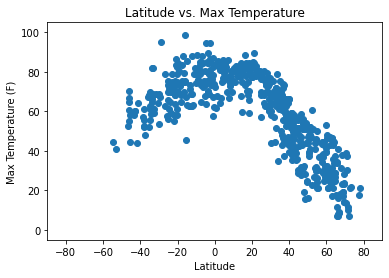

In [59]:
# Latitude vs. Temperature scatterplot
plt.scatter(latitude, max_temperature)
plt.title('Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.xlim(-90, 90)
plt.ylim(-5, 105)

plt.savefig(r'C:\Users\Mason\Data_Bootcamp\API-Weather\WeatherPy\.pngs\lattemp.png')

Code creates scatterplot that shows the maximum temperature for cities based on latitude. As one might expect, the closer that a city is to the equator (latitude 0), the higher the maximum temperature.

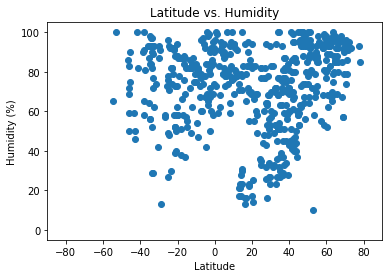

In [60]:
# Latitude vs. Humidity scatterplot
plt.scatter(latitude, humidity)
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xlim(-90, 90)
plt.ylim(-5, 105)

plt.savefig(r'C:\Users\Mason\Data_Bootcamp\API-Weather\WeatherPy\.pngs\lathum.png')

Code creates scatterplot that shows the humidity for cities based on latitude.

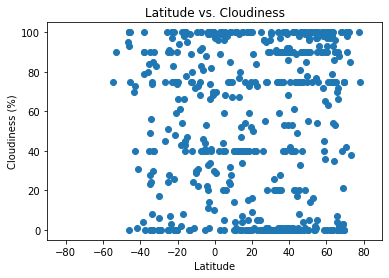

In [61]:

# Latitude vs. Cloudiness scatterplot
plt.scatter(latitude, cloudiness)
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlim(-90, 90)
plt.ylim(-5, 105)

plt.savefig(r'C:\Users\Mason\Data_Bootcamp\API-Weather\WeatherPy\.pngs\latcloud.png')

Code creates scatterplot that shows the cloudiness for cities based on latitude.

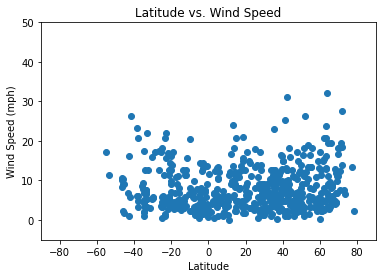

In [62]:
# Latitude vs. Wind Speed scatterplot
plt.scatter(latitude, wind_speed)
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xlim(-90, 90)
plt.ylim(-5, 50)

plt.savefig(r'C:\Users\Mason\Data_Bootcamp\API-Weather\WeatherPy\.pngs\latwind.png')

Code creates scatterplot that shows the wind speed for cities based on latitude.

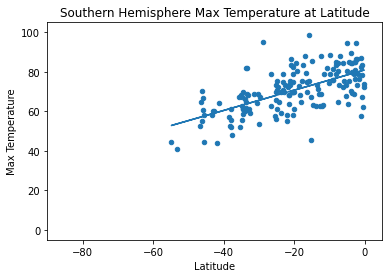

In [63]:
# Linear Regression for Southern Hemispheres (Max Temperature)
slope, intercept, r_value, p_value, std_err = st.linregress(SouthernHemiDF['Latitude'], SouthernHemiDF['Max Temperature'])

SouthernHemiDF.plot.scatter('Latitude', 'Max Temperature', title = 'Southern Hemisphere Max Temperature at Latitude')
plt.xlim(-90, 5)
plt.ylim(-5, 105)
plt.plot(SouthernHemiDF['Latitude'], intercept + slope * SouthernHemiDF['Latitude'])

plt.savefig(r'C:\Users\Mason\Data_Bootcamp\API-Weather\WeatherPy\.pngs\s_temp_linreg.png')

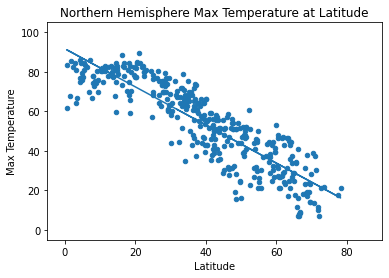

In [64]:
# Linear Regression for Northern Hemispheres (Max Temperature)
slope, intercept, r_value, p_value, std_err = st.linregress(NorthernHemiDF['Latitude'], NorthernHemiDF['Max Temperature'])

NorthernHemiDF.plot.scatter('Latitude', 'Max Temperature', title = 'Northern Hemisphere Max Temperature at Latitude')
plt.xlim(-5, 90)
plt.ylim(-5, 105)
plt.plot(NorthernHemiDF['Latitude'], intercept + slope * NorthernHemiDF['Latitude'])

plt.savefig(r'C:\Users\Mason\Data_Bootcamp\API-Weather\WeatherPy\.pngs\n_temp_linreg.png')

Both regressions indicate that latitude and max temperature are postively correllated.

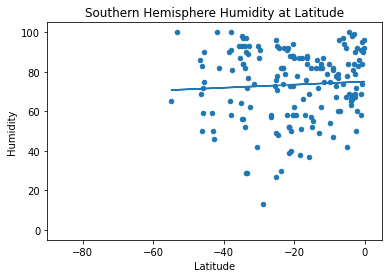

In [65]:
# Linear Regression for Southern Hemispheres (Humidity)
slope, intercept, r_value, p_value, std_err = st.linregress(SouthernHemiDF['Latitude'], SouthernHemiDF['Humidity'])

SouthernHemiDF.plot.scatter('Latitude', 'Humidity', title = 'Southern Hemisphere Humidity at Latitude')
plt.xlim(-90, 5)
plt.ylim(-5, 105)
plt.plot(SouthernHemiDF['Latitude'], intercept + slope * SouthernHemiDF['Latitude'])

plt.savefig(r'C:\Users\Mason\Data_Bootcamp\API-Weather\WeatherPy\.pngs\s_hum_linreg.png')

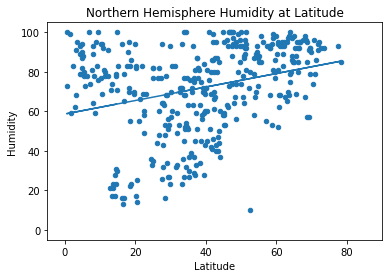

In [66]:
# Linear Regression for Northern Hemispheres (Humidity)
slope, intercept, r_value, p_value, std_err = st.linregress(NorthernHemiDF['Latitude'], NorthernHemiDF['Humidity'])

NorthernHemiDF.plot.scatter('Latitude', 'Humidity', title = 'Northern Hemisphere Humidity at Latitude')
plt.xlim(-5, 90)
plt.ylim(-5, 105)
plt.plot(NorthernHemiDF['Latitude'], intercept + slope * NorthernHemiDF['Latitude'])

plt.savefig(r'C:\Users\Mason\Data_Bootcamp\API-Weather\WeatherPy\.pngs\n_hum_linreg.png')

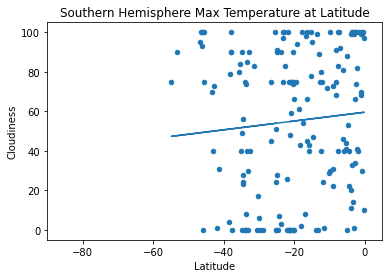

In [67]:
# Linear Regression for Southern Hemispheres (Cloudiness)
slope, intercept, r_value, p_value, std_err = st.linregress(SouthernHemiDF['Latitude'], SouthernHemiDF['Cloudiness'])

SouthernHemiDF.plot.scatter('Latitude', 'Cloudiness', title = 'Southern Hemisphere Max Temperature at Latitude')
plt.xlim(-90, 5)
plt.ylim(-5, 105)
plt.plot(SouthernHemiDF['Latitude'], intercept + slope * SouthernHemiDF['Latitude'])

plt.savefig(r'C:\Users\Mason\Data_Bootcamp\API-Weather\WeatherPy\.pngs\s_cloud_linreg.png')

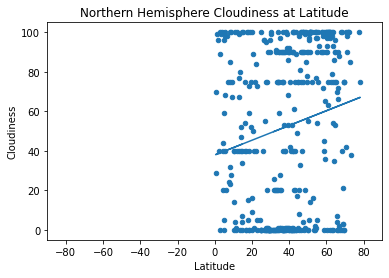

In [68]:
# Linear Regression for Northern Hemispheres (Cloudiness)
slope, intercept, r_value, p_value, std_err = st.linregress(NorthernHemiDF['Latitude'], NorthernHemiDF['Cloudiness'])

NorthernHemiDF.plot.scatter('Latitude', 'Cloudiness', title = 'Northern Hemisphere Cloudiness at Latitude')
plt.xlim(-90, 90)
plt.ylim(-5, 105)
plt.plot(NorthernHemiDF['Latitude'], intercept + slope * NorthernHemiDF['Latitude'])

plt.savefig(r'C:\Users\Mason\Data_Bootcamp\API-Weather\WeatherPy\.pngs\n_cloud_linreg.png')

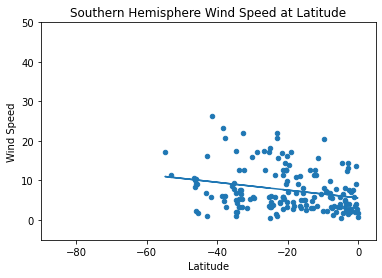

In [69]:
# Linear Regression for Southern Hemispheres (Wind Speed)
slope, intercept, r_value, p_value, std_err = st.linregress(SouthernHemiDF['Latitude'], SouthernHemiDF['Wind Speed'])

SouthernHemiDF.plot.scatter('Latitude', 'Wind Speed', title = 'Southern Hemisphere Wind Speed at Latitude')
plt.xlim(-90, 5)
plt.ylim(-5, 50)
plt.plot(SouthernHemiDF['Latitude'], intercept + slope * SouthernHemiDF['Latitude'])

plt.savefig(r'C:\Users\Mason\Data_Bootcamp\API-Weather\WeatherPy\.pngs\s_wind_linreg.png')

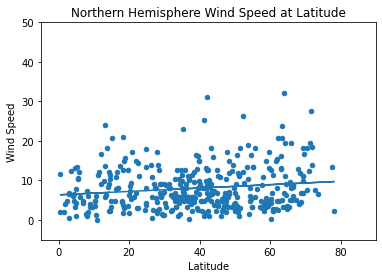

In [70]:
# Linear Regression for Northern Hemispheres (Wind Speed)
slope, intercept, r_value, p_value, std_err = st.linregress(NorthernHemiDF['Latitude'], NorthernHemiDF['Wind Speed'])

NorthernHemiDF.plot.scatter('Latitude', 'Wind Speed', title = 'Northern Hemisphere Wind Speed at Latitude')
plt.xlim(-5, 90)
plt.ylim(-5, 50)
plt.plot(NorthernHemiDF['Latitude'], intercept + slope * NorthernHemiDF['Latitude'])

plt.savefig(r'C:\Users\Mason\Data_Bootcamp\API-Weather\WeatherPy\.pngs\n_wind_linreg.png')